In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
a = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
b = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [3]:
a.mean()

np.float64(23.75)

In [4]:
b.mean()

np.float64(27.916666666666668)

In [23]:
d = b.mean() - a.mean()
d

np.float64(4.166666666666668)

In [7]:
np.ones(len(b))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
np.append(np.zeros(len(a)), np.ones(len(b)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [5]:
sales = np.array([
    np.append(np.zeros(len(a)), np.ones(len(b))),
    np.append(a, b)
])

In [9]:
print(sales)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.]
 [23. 21. 19. 24. 35. 17. 18. 24. 33. 27. 21. 23. 31. 28. 19. 24. 32. 27.
  16. 41. 23. 32. 29. 33.]]


In [11]:
sales_t = sales.T
sales_t

array([[ 0., 23.],
       [ 0., 21.],
       [ 0., 19.],
       [ 0., 24.],
       [ 0., 35.],
       [ 0., 17.],
       [ 0., 18.],
       [ 0., 24.],
       [ 0., 33.],
       [ 0., 27.],
       [ 0., 21.],
       [ 0., 23.],
       [ 1., 31.],
       [ 1., 28.],
       [ 1., 19.],
       [ 1., 24.],
       [ 1., 32.],
       [ 1., 27.],
       [ 1., 16.],
       [ 1., 41.],
       [ 1., 23.],
       [ 1., 32.],
       [ 1., 29.],
       [ 1., 33.]])

In [25]:
np.random.shuffle(sales_t) #بر زدن

In [26]:
sales_t

array([[ 0., 33.],
       [ 0., 24.],
       [ 1., 23.],
       [ 0., 19.],
       [ 0., 24.],
       [ 0., 18.],
       [ 1., 31.],
       [ 0., 27.],
       [ 1., 33.],
       [ 0., 21.],
       [ 1., 24.],
       [ 1., 29.],
       [ 1., 28.],
       [ 0., 23.],
       [ 1., 19.],
       [ 0., 21.],
       [ 1., 32.],
       [ 1., 41.],
       [ 1., 27.],
       [ 0., 17.],
       [ 0., 23.],
       [ 1., 32.],
       [ 0., 35.],
       [ 1., 16.]])

In [31]:
experiment_label = np.random.randint(0, 2, len(sales_t))
experiment_label #تولید صفر  یک رندوم

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [33]:
experiment_data = np.array([
    experiment_label,
    sales_t[:, 1]
])
print(experiment_data)

[[ 0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.
   0.  0.  0.  0.  0.  0.]
 [33. 24. 23. 19. 24. 18. 31. 27. 33. 21. 24. 29. 28. 23. 19. 21. 32. 41.
  27. 17. 23. 32. 35. 16.]]


In [34]:
experiment_data_t = experiment_data.T
experiment_data_t

array([[ 0., 33.],
       [ 0., 24.],
       [ 0., 23.],
       [ 1., 19.],
       [ 1., 24.],
       [ 1., 18.],
       [ 1., 31.],
       [ 1., 27.],
       [ 0., 33.],
       [ 0., 21.],
       [ 0., 24.],
       [ 0., 29.],
       [ 0., 28.],
       [ 1., 23.],
       [ 0., 19.],
       [ 1., 21.],
       [ 0., 32.],
       [ 1., 41.],
       [ 0., 27.],
       [ 0., 17.],
       [ 0., 23.],
       [ 0., 32.],
       [ 0., 35.],
       [ 0., 16.]])

In [35]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1]

array([19., 24., 18., 31., 27., 23., 21., 41.])

In [36]:
experiment_data_t[experiment_data_t[:, 0] == 0][:, 1].mean()

np.float64(26.0)

In [40]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1].mean()

np.float64(25.5)

In [41]:
np.empty([10,1])

array([[1.4115e-320],
       [7.7771e-320],
       [5.3359e-321],
       [9.5572e-320],
       [2.8547e-320],
       [2.8547e-320],
       [9.5572e-320],
       [5.3359e-321],
       [7.7771e-320],
       [1.4115e-320]])

In [42]:
def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(sales_t))
        experiment_data = np.array([
            experiment_label,
            sales_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean

In [43]:
e1 = sh_exp(1000)

In [44]:
print(e1)

[[-3.5       ]
 [-2.04195804]
 [ 2.97142857]
 [ 3.16083916]
 [ 0.36363636]
 [ 2.37762238]
 [-3.5       ]
 [-2.38655462]
 [-3.66433566]
 [-2.04444444]
 [ 6.45714286]
 [-4.33566434]
 [ 0.33333333]
 [ 0.81118881]
 [ 2.75      ]
 [-4.        ]
 [ 4.        ]
 [ 4.39160839]
 [ 0.91428571]
 [ 1.37062937]
 [ 2.17142857]
 [-1.48251748]
 [ 3.25      ]
 [ 1.31468531]
 [ 3.54285714]
 [ 1.65714286]
 [ 4.16666667]
 [ 0.62222222]
 [ 1.33333333]
 [ 2.62857143]
 [-0.97902098]
 [-6.51748252]
 [ 3.11111111]
 [ 2.875     ]
 [-0.45714286]
 [-1.81818182]
 [-5.06293706]
 [ 0.8       ]
 [ 0.30769231]
 [ 4.5625    ]
 [ 2.15384615]
 [-0.22857143]
 [-3.66433566]
 [-0.08888889]
 [ 1.14685315]
 [-0.16666667]
 [ 5.16666667]
 [-3.16083916]
 [-0.1958042 ]
 [ 0.02797203]
 [-1.14285714]
 [-4.71111111]
 [-7.55555556]
 [ 6.66666667]
 [-2.22222222]
 [-1.53846154]
 [-6.28571429]
 [ 0.86713287]
 [-4.22857143]
 [ 4.88888889]
 [-1.82857143]
 [-0.86713287]
 [-2.        ]
 [-4.68571429]
 [ 5.9020979 ]
 [ 5.83333333]
 [ 6.44444

In [ ]:
len(e1[e1 >= d]) #P Value

71

In [48]:
71 / 1000 * 100

7.1

C:\Users\Aria\AppData\Local\Temp\ipykernel_1860\2476525324.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e1, bins=50)


<Axes: ylabel='Density'>

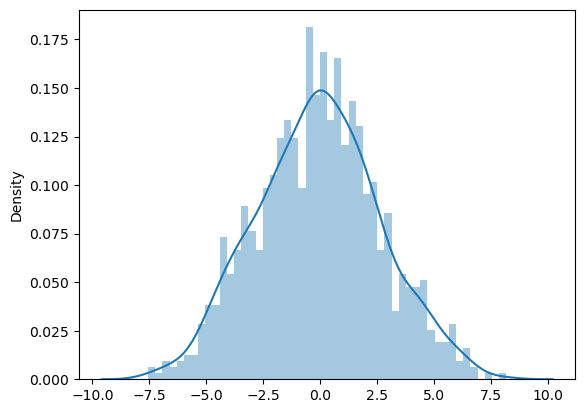

In [49]:
sns.distplot(e1, bins=50)